### 1. Generate 2D Gaussian distribution

----------------------------------------

In [10]:
import numpy as np 
from math import *
import matplotlib.pyplot as plt
from scipy.stats import norm

# this allows plots to appear directly in the notebook
%matplotlib inline

# Params
n_inpoints = 100

#### Class 0

[-1.25606127  0.84826167 -2.86226367  0.08074525  0.67178696 -1.28053243
  0.08942361  0.33353931 -0.70850047  1.57660238  0.60571706 -3.16458489
 -1.15437827 -0.81867325 -0.86977607 -2.01539969 -0.94665261 -0.11260779
  0.02662929 -1.59109492  2.86878561 -2.74123991  2.45695375 -0.41540748
  0.61043029 -1.75571868  0.08327463 -1.02052784  0.85346742 -1.25124783
 -1.37962984 -1.90528401 -0.72702513 -2.86864457 -0.08549764 -0.84981031
  1.00931525  0.93570851 -0.17171108 -0.20362613  2.51647328 -1.06412182
 -0.66228555  1.31830862 -0.71234707  0.86817676  1.48183768  0.85832221
  0.50488063  1.37233988 -0.38875083 -0.7166707   0.6104161   0.88076463
 -1.31855843 -1.47922492  0.03212238 -0.81144719  2.11430543  0.19512314
 -1.21711287  2.47852125 -1.3143748   1.48359728  0.16074    -0.60722344
  1.49123969  1.58099677  2.46545998  0.18108728 -0.93052606  1.08876715
  0.4783849  -1.49157003  1.32407768  0.27268499 -1.53101908  0.15858733
 -0.08152599  1.49382537 -0.12293819 -1.0197975   1

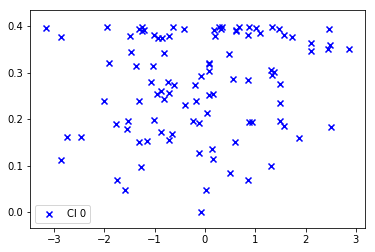

In [13]:
theta0 = 0
lmb01 = 2
lmb02 = 1
m0 = (0,  0)
# computing u * u.T and later multiplying with lambda
cov01 = [[(cos(theta0))**2,    cos(theta0)*sin(theta0)], 
         [(sin(theta0))*cos(theta0), (sin(theta0))**2]]
cov02 = [[(sin(theta0))**2,    -(cos(theta0)*sin(theta0))], 
         [-(cos(theta0)*sin(theta0)), (cos(theta0))**2]]
cov0 = lmb01*np.matrix(cov01) + lmb02*np.matrix(cov02)
#print(cov0)
x0, y0 = np.random.multivariate_normal(m0, cov0, n_inpoints).T
y0 = norm.pdf(y0)
#print(y0)
plt.scatter(x0, y0, color = 'b',marker='x', label = 'Cl 0')
plt.legend()    
plt.show()

#### Class 1 (Mixture A & B)

In [3]:
theta1a = -3*pi/4
lmb1a1 = 2
lmb1a2 = 1/4
m1a = (-2, 1)
cov1a = [[(cos(theta1a))**2,    cos(theta1a)*sin(theta1a)], 
         [(sin(theta1a))*cos(theta1a), (sin(theta1a))**2]]
cov2a = [[(sin(theta1a))**2,    -(cos(theta1a)*sin(theta1a))], 
         [-(cos(theta1a)*sin(theta1a)), (cos(theta1a))**2]]
#cov1a = [[2.25,0],[0,2.25]]
cov1a = lmb1a1*np.matrix(cov1a) + lmb1a2*np.matrix(cov2a)
#print(cov1a)
x1a, y1a = np.random.multivariate_normal(m1a, cov1a, n_inpoints).T
y1a = y1a * (1 / 3)
x1a = x1a * (1 / 3)
#print('Shape: ',x1a.shape,', ',y1a.shape)

In [4]:
theta1b = pi/4
lmb1b1 = 3
lmb1b2 = 1
m1b = (3, 2)
cov1b = [[(cos(theta1b))**2,    cos(theta1b)*sin(theta1b)], 
         [(sin(theta1b))*cos(theta1b), (sin(theta1b))**2]]
cov2b = [[(sin(theta1b))**2,    -(cos(theta1b)*sin(theta1b))], 
         [-(cos(theta1b)*sin(theta1b)), (cos(theta1b))**2]]
cov1b = lmb1b1*np.matrix(cov1b) + lmb1b2*np.matrix(cov2b)
print(cov1b)
x1b, y1b = np.random.multivariate_normal(m1b, cov1b, n_inpoints).T
y1b = y1b * (2 / 3)
x1b = x1b * (2 / 3)
#print('Shape: ',x1b.shape,', ',y1b.shape)

[[2. 1.]
 [1. 2.]]


In [5]:
y1 = np.array(y1a)+np.array(y1b)
y1 = norm.pdf(y1)
#print(y1)
x1 = np.array(x1a)+np.array(x1b)
print('Shape: ',y1.shape)

Shape:  (100,)


#### Combined plot 

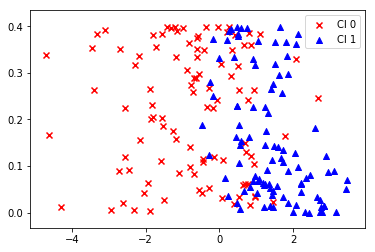

In [6]:
plt.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
plt.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
plt.legend()    
plt.show()

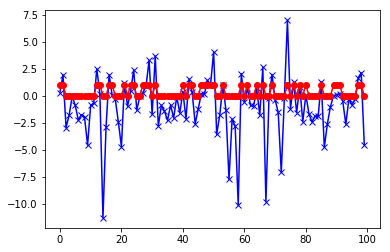

In [9]:
#Draw the distribution 
#plt.plot( y0, color = 'r',marker='x', label = 'Cl 0')
#plt.plot( y1, color = 'g',marker='x', label = 'Cl 1')
y = y1 / y0
#y = log(y,2)
y_ll = [log(x,2) for x in y]
z_ll = [(x>0)?1:0 for x in y_ll]
plt.plot( y_ll, color = 'b',marker='x', label = 'Cl')
plt.plot( z_ll, color = 'r',marker='o', label = 'Cl')

plt.show()

### 2. MAP 

Compute log likelihoods 



log [(aposterioryc1 * priorc1)/(aposterioryc2 * priorc2)]
